In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import scipy
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


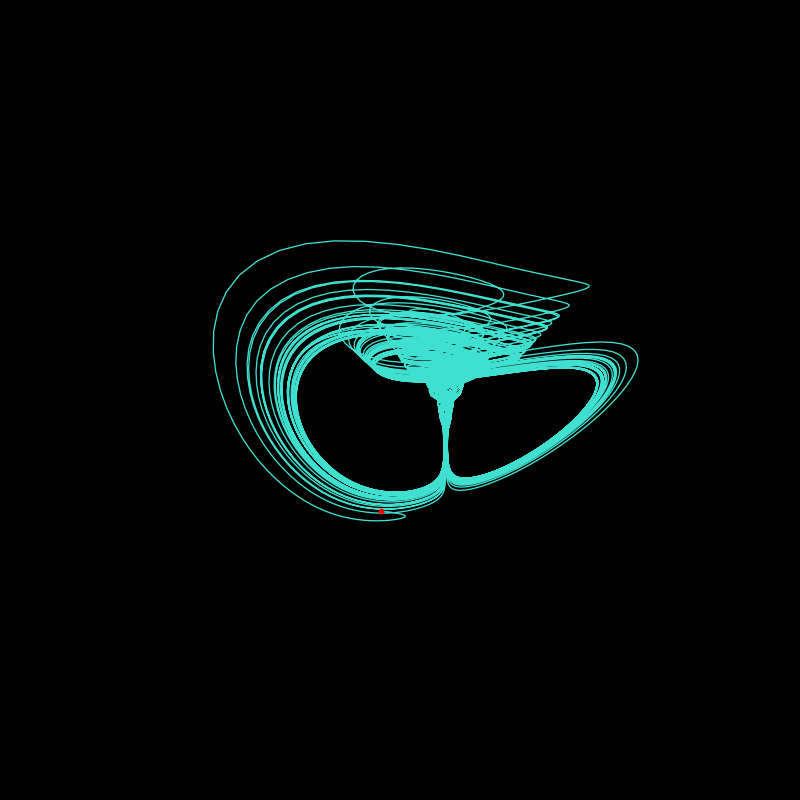

"    \nelse:\n    coord = np.arange(-0.5,1.1,0.05)          # a range of initial conditions\n    init_cond = np.asarray(np.meshgrid(coord, coord, coord))\n    init_cond = np.reshape(init_cond, (init_cond.shape[1]*init_cond.shape[2]*init_cond.shape[3], 3))\n    for i in range(len(init_cond)):\n        # Integrating the system\n        xyz0 = init_cond[i,:]\n        state = scipy.integrate.odeint(chen_lee_attractor_dynamics, xyz0, t)\n        ax.scatter(xyz0[0], xyz0[1], xyz0[2], c='r', s=50)\n        ax.text(xyz0[0], xyz0[1], xyz0[2], '{},{},{}'.format(xyz0[0], xyz0[1], xyz0[2]))\n        ax.plot(state[:,0], state[:,1], state[:,2], 'b', lw=0.5)    \n    plt.show()\n"

In [9]:
# Chen Lee Attractor
# ------------------------------------------------------------------------------------------------------------------

# Defining the Dynamics of the Chen Lee Attractor

# Defining the constants required
a = 5
b = -10
d = -0.38

# System Dynamics in a function routine
def chen_lee_attractor_dynamics(t, state):
    x = state[0]
    y = state[1]
    z = state[2]
    dxdt = a*x - y*z
    dydt = b*y + x*z
    dzdt = d*z + (x*y/3)
    return [dxdt, dydt, dzdt]


# Integrating the system dynamics to produce the curve
T = 250
t = np.arange(0,T,0.01)
steps = len(t)
states = np.zeros((len(t)*steps,3))             # [ (Number of time steps) x (3 coords) ]

# Plotting the curve
ax = plt.figure(facecolor = 'k', figsize=(8, 8)).add_subplot(projection='3d')
ax.set_facecolor('k')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Chen Lee Attractor")

single_init_cond = 1

if single_init_cond:
    # Initial condition
    xyz0 = 3;    xyz1 = 6;    xyz2 = 2
    state = solve_ivp(chen_lee_attractor_dynamics, (0, T), (xyz0, xyz1, xyz2), method='RK45', dense_output=True)
    x, y, z = state.sol(t)                    # t vector defined earlier
    ax.scatter( xyz0, xyz1, xyz2, c='r', s=10)
    # ax.text(xyz0, xyz1, xyz2, '{},{},{}'.format(xyz0, xyz1, xyz2))
    ax.plot(x, y, z, 'turquoise', lw=0.95)
    ax.set_axis_off()
    plt.show()


"""    
else:
    coord = np.arange(-0.5,1.1,0.05)          # a range of initial conditions
    init_cond = np.asarray(np.meshgrid(coord, coord, coord))
    init_cond = np.reshape(init_cond, (init_cond.shape[1]*init_cond.shape[2]*init_cond.shape[3], 3))
    for i in range(len(init_cond)):
        # Integrating the system
        xyz0 = init_cond[i,:]
        state = scipy.integrate.odeint(chen_lee_attractor_dynamics, xyz0, t)
        ax.scatter(xyz0[0], xyz0[1], xyz0[2], c='r', s=50)
        ax.text(xyz0[0], xyz0[1], xyz0[2], '{},{},{}'.format(xyz0[0], xyz0[1], xyz0[2]))
        ax.plot(state[:,0], state[:,1], state[:,2], 'b', lw=0.5)    
    plt.show()
"""